In [48]:
import cv2
import numpy as np
from itertools import product
import pandas as pd
import time
import numpy_indexed as npi
from collections import Counter
import matplotlib.pyplot as plt

In [49]:
final_matrices = []
def otsu_method(image):
    #image = cv2.imread("G:/Image_2022/gray49/images_aq_gray/gray49/im{}.jpg".format(i),cv2.IMREAD_GRAYSCALE)
    bins_num = 256
    hist, bin_edges = np.histogram(image, bins=bins_num)
    #if is_normalized:
    #    hist = np.divide(hist.ravel(), hist.max())
    bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.
    weight1 = np.cumsum(hist)
    weight2 = np.cumsum(hist[::-1])[::-1]
    mean1 = np.cumsum(hist * bin_mids) / weight1
    mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]
    inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
    index_of_max_val = np.argmax(inter_class_variance)
    threshold = bin_mids[:-1][index_of_max_val]
    #print("Otsu's algorithm implementation thresholding result: ", threshold)
    #count+=1
    ret, thresh1 = cv2.threshold(image, threshold, 255, cv2.THRESH_OTSU)
    return thresh1

In [5]:
def compare(i1, i2):
    m1, c1 = i1[0], i1[1]
    m2, c2 = i2[0], i2[1]
    m = np.vstack((m1, m2))
    
    u = np.unique(m, axis=0, return_counts=True)
    
    arr, c = [], []
    for i in range(len(u[0])):
        
        element = u[0][i]
        index1 = np.flatnonzero(npi.contains([element], m1))
        index2 = np.flatnonzero(npi.contains([element], m2))
        arr.append(element) 
        if u[1][i] == 2:
            c.append(c1[index1[0]]+c2[index2[0]])
        else:
            if len(index2):
                c.append(c2[index2[0]])
            else:
                c.append(c1[index1[0]])
        
        
    return(np.array(arr), np.array(c))

In [6]:
def foo(matrix):
    flatten = []
    for i in matrix:
        flatten.append(i.ravel())
        
    #print(flatten)
    flatten = pd.DataFrame(flatten)
    u = np.unique(flatten, axis=0, return_counts=True)
    #print(u)
    return u

In [77]:
start = time.time()
img_initial = otsu_method(cv2.imread("/home/ritwik/Compression/flower/gray49/im1.jpg",cv2.IMREAD_GRAYSCALE))
for j in range(0,512,4):
    for k in range(0,512,4):
            final_matrices.append((img_initial[j:j+4,k:k+4])) 

past = foo(final_matrices)
#print(final_matrices)

n = len(past[0])
name = [str(i) for i in range(n)]

#counts = []
for i in range(2,5):
    mat = []
    img1 = otsu_method(cv2.imread("/home/ritwik/Compression/flower/gray49/im{}.jpg".format(i),cv2.IMREAD_GRAYSCALE))
    #count = 0
    for j in range(0,512,4):
        for k in range(0,512,4):            
            mat.append(img1[j:j+4,k:k+4])
    #print(np.array(mat).shape)
    unique = foo(mat)
    #print(mat)
    print(len(past[0]))
    past = compare(past, unique)

end = time.time()
print(end-start) 

2044
2963
3569
7.942476987838745


In [145]:
import codecs

In [310]:
initial_mat = []
for i in range(len(mat)):
    initial_mat.append(mat[i].ravel())

for i in range(len(initial_mat)):
    for j in range(len(initial_mat[i])):
        if initial_mat[i][j] == 255:
            initial_mat[i][j] = 1

str_mat = []
for i in range(len(initial_mat)):
    str_mat.append(initial_mat[i])

str_lst = []
for ele in str_mat:    
    str_lst.append(list(ele))
    

#for i in range(len(str_lst)):   
#    listToStr = ''.join(str(str_lst[i]))
#    print(listToStr)

final_string_lst = []
for i in range(len(str_lst)):
    string = ''
    for j in range(len(str_lst[i])):
        
        string += (format(str_lst[i][j],".0f"))
    final_string_lst.append(string)

    
final_decimal_lst = []
for i in range(len(final_string_lst)):
    final_decimal_lst.append(int(final_string_lst[i],2))
    
#np.set_printoptions(threshold=np.inf)
print(final_decimal_lst)

[3, 8, 0, 0, 0, 0, 513, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4096, 49152, 38912, 32768, 0, 0, 0, 0, 0, 0, 52224, 0, 0, 0, 0, 0, 0, 12288, 32768, 0, 0, 0, 0, 49152, 0, 0, 1, 8, 1, 255, 16382, 65488, 64909, 65535, 32767, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65519, 4352, 65532, 65534, 39398, 56526, 239, 63281, 65534, 65520, 65535, 65534, 65535, 65535, 65260, 63280, 16383, 61427, 13081, 65518, 57617, 32748, 13106, 0, 0, 0, 0, 0, 0, 0, 0, 0, 32768, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14199, 52428, 0, 0, 0, 0, 38499, 49160, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 256, 0, 0, 0, 0, 0, 0, 0, 0, 231, 895, 65532, 65281, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65534, 60550, 0, 49152, 19, 137, 24584, 65520, 16368, 65520, 53232, 65520, 65521, 32752, 65535, 5

In [385]:
len(final_decimal_lst)

16384

In [63]:
np.set_printoptions(threshold=np.inf)
past[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 255,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        255,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        255,   0, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        255, 255,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        255, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,
          0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,
          0,   0, 255],
       [  0,   0,   0,   0,   

In [74]:
for i in range(len(past[0])):
    for j in range(len(past[0][i])):
        if past[0][i][j] == 255:
            past[0][i][j] = 1

str_past = []
for i in range(len(past[0])):
    str_past.append(str(i))
    
#print(str(past[0]))
res = list(map(''.join, str_past))
print(res)
#for k in range(len(past[0])):
#    print(int(str(past[0][k]),2))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '15

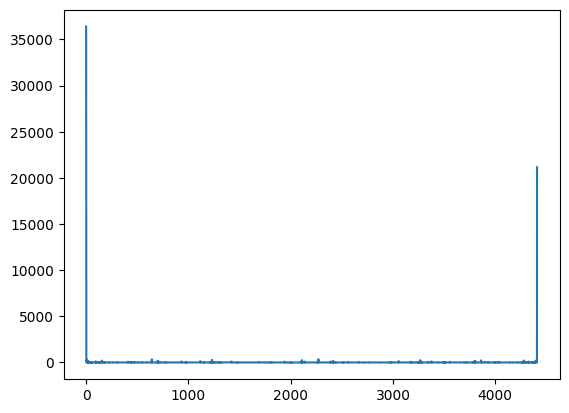

In [57]:
a = np.arange(1,len(past[1]) + 1,1)
plt.plot(a,past[1])

In [ ]:
def four_wise_hash()

In [388]:
def zeros_func(d):
    binary = np.binary_repr(d, width = 16)
    
    
    return len(binary) - len(binary.rstrip('0'))

z = 0
for i in range(len(final_decimal_lst)):
    
    if zeros_func(final_decimal_lst[i]) > z:
        
        z = zeros_func(final_decimal_lst[i])
        
z

16

In [62]:
#----------------------------------AMS Implementation---------------------------------------------------

In [675]:
## declaring the hash function
import random

def hash_function(a, b, x, p, m):
    return ((a*x + b) % p) % m

def zeros_func(data):
    binary = np.binary_repr(data, width = 64)
    return (len(binary) - len(binary.rstrip('0')))
    
def ams_unique_count(data, p, m):
    a = random.randint(0, p - 1) 
    b = random.randint(0, p - 1)  
    z = 0
    counts = []
    for i in range(m):
        counts.append(hash_function(a,b,data[i],p,100000))
    for i in range(len(counts)):
        if zeros_func(counts[i]) > z:
            z = zeros_func(counts[i])
            
    
    estimate = 2**z
    return estimate

# Example usage
data = final_decimal_lst
p = 314159
#p = 10000019# a large prime number
m = 16384  # range of the hash function
#k = 1000  # number of hash functions to use
count_list_ams = []
for i in range(1000):
    count_list_ams.append(ams_unique_count(data, p, m))

l_ams = list(np.sort(count_list_ams))
l_ams[int(len(count_list_ams)/2)]
#print("Number of unique elements in the set:", count)


2048

In [672]:
def hash_function(a, b, x, p, m):
    return ((a*x + b) % p) % m
p = 10000019
m = 16384
def zeros_func(data):
    binary = np.binary_repr(data, width = 32)
    return (len(binary) - len(binary.rstrip('0')))

a = random.randint(0, p - 1) 
b = random.randint(0, p - 1)  
z = 0
counts = []
for i in range(m):
    counts.append(hash_function(a,b,data[i],p,1432123))
    
data = final_decimal_lst

len(np.unique(counts))

1846

In [611]:
len(np.unique(final_decimal_lst))

1846

In [661]:
def hash_function(a, b, x, p, m):
    return ((a*x + b) % p) % m

def zeros_func(data):
    binary = np.binary_repr(data, width = 32)
    return (len(binary) - len(binary.rstrip('0')))
    
def ams_unique_count(data, p, m, k):
    a = [random.randint(0, p - 1) for _ in range(k)]
    b = [random.randint(0, p - 1) for _ in range(k)]
    counts = [0] * m
    z = 0
    for x in data:
        for i in range(k):
            value = hash_function(a[i], b[i], x, p, m)
            counts[i] = value
            if zeros_func(value) > z:
                z = zeros_func(value)

    estimate = 2*z
    return estimate

# Example usage
p = 16384# a large prime number
m = 16384  # range of the hash function
k = 16384  # number of hash functions to use
count = ams_unique_count(final_decimal_lst, p, m, k)
print("Number of unique elements in the set:", count)

KeyboardInterrupt: 

In [656]:
#----------------------------Idealized hash algo---------------------------------------------------

In [659]:
def random_hash(a, b, x):
    return (a*x + b) % 1

def flajolet(data,m):
    
    a = random.uniform(0,1)
    b = random.uniform(0,1)
    counts = []

    for i in range(m):
        counts.append(random_hash(a,b,data[i]))
            
    return ((1 / ((min(counts)))) - 1)

data = final_decimal_lst
m = len(data)

s = 0.0
count_list = []
for i in range(1000):
    count_list.append(flajolet(final_decimal_lst, m))
    #count_list = np.sort(np.array(count_list))
    
#print(count_list[len(count_lst)/2])
#len(np.unique(data))

In [660]:
l = list(np.sort(count_list))
l[int(len(count_list)/2)]

2333.0939089687954

In [655]:
def random_hash(a, b, x):
    return (a*x + b) % 1

data = [1,2,3,4,5]
m = len(data)
a = random.uniform(0,1)
b = random.uniform(0,1)

counts = []

for i in range(m):
    counts.append(random_hash(a,b,data[i]))

counts

[0.5296189033452039,
 0.866240515436401,
 0.20286212752759814,
 0.5394837396187953,
 0.8761053517099924]

In [452]:
a = [random.uniform(0,1) for _ in range(5)]
a

[0.7515240525863137,
 0.38899357913914145,
 0.6695785896680992,
 0.6555397528440343,
 0.5511299100984955]

In [332]:
#-------------------------------------BJKST Implmentation---------------------------------------------------

In [383]:
import random

def bjkst_unique_count(data, s):
    """BJKST algorithm for counting the number of unique elements in a set"""
    # Initialize the hash table with empty buckets
    table = [set() for _ in range(s)]
    for x in data:
        # Hash the element to one of the buckets
        j = random.randint(0, s-1)
        # Add the element to the bucket
        table[j].add(x)
    # Count the number of non-empty buckets
    counts = [len(bucket) for bucket in table]
    non_empty_buckets = sum(1 for count in counts if count > 0)
    # Estimate the number of unique elements
    estimate = s * (non_empty_buckets - 1) / sum((count-1)/s for count in counts if count > 1)
    return estimate

# Example usage
data = final_decimal_lst
s = 225 # number of buckets
count = bjkst_unique_count(data, s)
print("Number of unique elements in the set:", count)


Number of unique elements in the set: 1857.7981651376138


In [ ]:
from streamlib.hashes.universalHashing import UniversalHash
from streamlib.utils import zeros, median, unionDict
from sketch import Sketch, BasicEstimator
from streamlib.wrappers import inherit_docs
import math


@inherit_docs
class _BJKST_Estimator(BasicEstimator):
    """
    Basic BJKST-Estimator to esimate # of distinct elements in a data stream.
    It gives a (eps, O(1))-approximation, and the "Constant Probability" can
    be amplified to high probability using Median Trick
    """
    def __init__(self, eps, thresh, uhash_h, uhash_g):
        """
        @args
        eps  : constrol the quality of estimation
        n    : the size of the universe
        uhash_x: a universal hash family to pick hash function x
        """
        self.h = uhash_h.pickHash()
        self.g = uhash_g.pickHash()
        self.z = 0
        self.B = {}
        self.thresh = thresh
        # print self.thresh

    def _shrinkB(self):
        while len(self.B) >= self.thresh:
            self.z += 1
            self.B = {k:v for k, v in self.B.items() if v >= self.z}


    def process(self, key):
        """ process the given item """
        hs = zeros(self.h.hash(key))
        if hs >= self.z:
            self.B[self.g.hash(key)] = hs
        
        
    def getEstimation(self):
        """
        return a integer as an (eps, O(1))-approximation of #
        of distinct elements in the data stream
        """
        return len(self.B) * (2**self.z)

    
    def merge(self, skc):
        self.B = unionDict(self.B, skc.B)
        self._shrinkB()



@inherit_docs
class BJKST(Sketch):
    """
    BJKST sketch for estimation the distinct frequency.
    Algorithm and Analysis can be found in:
    http://www.cs.dartmouth.edu/~ac/Teach/CS49-Fall11/Notes/lecnotes.pdf
    or 
    https://github.com/jiecchen/references/blob/master/lecnotes.pdf
    Usage:
    @args
    n           :  the size of universe
    eps, delta  :  control the quality of estimation
    @return
    BJKST(n, eps, delta) returns  an (eps, delta) - BJKST sketch with para eps and delta.
    Example:
    ------------------
    d = DataStream(list("qwertyuiopasdfghjklzxcvbnm"), 1000)
    sketch = BJKST(26, 0.1, 0.001)
    for x in d:
        sketch.process(x)
    print sketch.getEstimation()
    ------------------
    """
    def __init__(self, n, eps, delta = 0.01):
        """
        @args
        n    :  the size of universe
        eps, delta: control the quality of estimation
        @return
        BJKST(n, eps, delta) returns  an (eps, delta) - BJKST sketch with para eps and delta.
        """
        uhash_h = UniversalHash(n)
        uhash_g = UniversalHash(int(math.log(n, 2)**2 * eps**(-4)))
        thresh = eps**(-2)
        n_hash = int(math.log(1. / delta)) + 1
        # print "n_hash = ", n_hash
        self.estimators = [_BJKST_Estimator(eps, thresh, uhash_h, uhash_g) for i in range(n_hash)]
    
    def process(self, key):
        """ process the key """
        for est in self.estimators:
            est.process(key)

            
    def getEstimation(self):
        """ return the (eps, delta)-approximation """
        return median( [est.getEstimation() for est in self.estimators] )

    def merge(self, skc):
        """ To be check """
        un = zip(self.estimators, skc.estimators)
        self.estimators = [u.merge(v) for u, v in un]
